In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
import urllib.request

In [43]:
import yfinance as yf

df = yf.download('AAPL', start='2000-01-01', end='2024-12-31', progress=False)
print(df.head)


<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2000-01-03    0.842150    0.846382    0.765035    0.789016  535796800
2000-01-04    0.771149    0.832276    0.761274    0.814408  512377600
2000-01-05    0.782433    0.831806    0.774910    0.780552  778321600
2000-01-06    0.714723    0.805003    0.714723    0.798421  767972800
2000-01-07    0.748578    0.759864    0.718485    0.726008  460734400
...                ...         ...         ...         ...        ...
2024-12-23  254.989655  255.369227  253.171646  254.490204   40858800
2024-12-24  257.916443  257.926411  255.009620  255.209412   23234700
2024-12-26  258.735504  259.814335  257.347047  257.906429   27237100
2024-12-27  255.309296  258.415896  252.782075  257.546826   42355300
2024-12-30  251.923019  253.221595  250.474615  251.952985  

In [44]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500


In [45]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.842150,0.846382,0.765035,0.789016,535796800
1,2000-01-04,0.771149,0.832276,0.761274,0.814408,512377600
2,2000-01-05,0.782433,0.831806,0.774910,0.780552,778321600
3,2000-01-06,0.714723,0.805003,0.714723,0.798421,767972800
4,2000-01-07,0.748578,0.759864,0.718485,0.726008,460734400


In [46]:
df = df.drop(['Date'], axis=1)
df.head()

C:\Users\mohit\AppData\Local\Temp\ipykernel_8968\2218488136.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.842150,0.846382,0.765035,0.789016,535796800
1,0.771149,0.832276,0.761274,0.814408,512377600
2,0.782433,0.831806,0.774910,0.780552,778321600
3,0.714723,0.805003,0.714723,0.798421,767972800
4,0.748578,0.759864,0.718485,0.726008,460734400


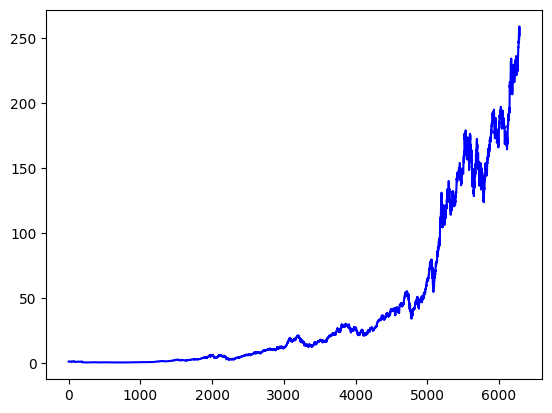

In [47]:
plt.plot(df.Close, 'b')

In [48]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.842150,0.846382,0.765035,0.789016,535796800
1,0.771149,0.832276,0.761274,0.814408,512377600
2,0.782433,0.831806,0.774910,0.780552,778321600
3,0.714723,0.805003,0.714723,0.798421,767972800
4,0.748578,0.759864,0.718485,0.726008,460734400
...,...,...,...,...,...
6283,254.989655,255.369227,253.171646,254.490204,40858800
6284,257.916443,257.926411,255.009620,255.209412,23234700
6285,258.735504,259.814335,257.347047,257.906429,27237100


In [49]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6283,228.969606
6284,229.357535
6285,229.859200
6286,230.346935


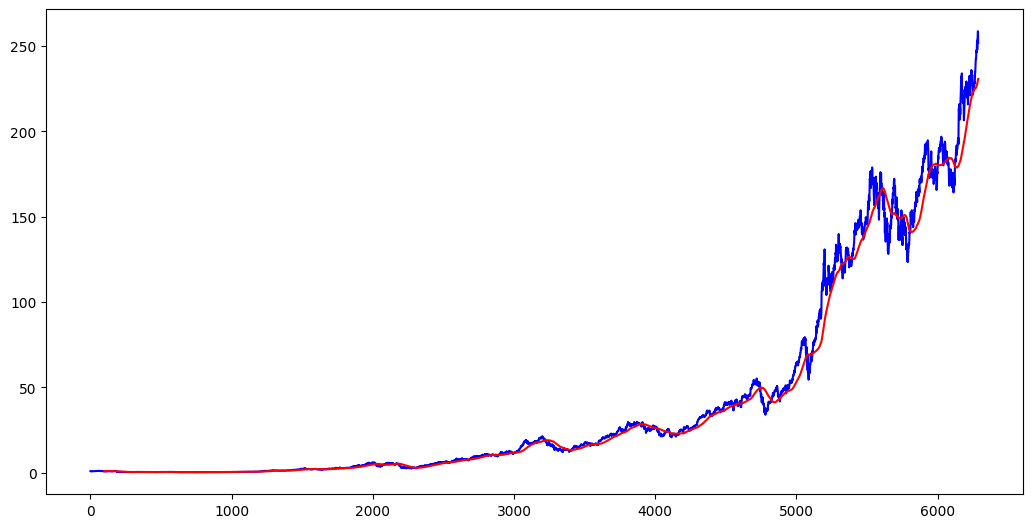

In [50]:
plt.figure(figsize=(12.6, 6.3))  

plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')

plt.show()

In [51]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6283,210.752679
6284,211.182571
6285,211.614169
6286,212.039086


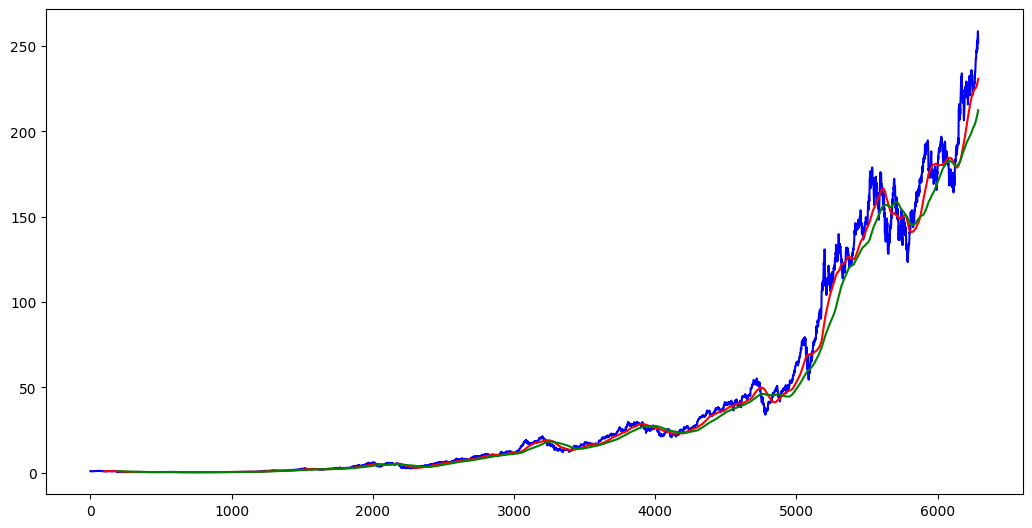

In [52]:
plt.figure(figsize=(12.6, 6.3))  

plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

plt.show()

In [53]:
df.shape

(6288, 5)

# Splitting Data into Training and Testing

In [54]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)                             

(4401, 1)
(1887, 1)


In [55]:
data_training.head()

Ticker,AAPL
0,0.842150
1,0.771149
2,0.782433
3,0.714723
4,0.748578


In [56]:
data_testing.head()

Ticker,AAPL
4401,33.590504
4402,33.469215
4403,33.606838
4404,33.289627
4405,33.627831


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [58]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01780519],
       [0.01584439],
       [0.01615603],
       ...,
       [0.92032382],
       [0.93384992],
       [0.92000177]])

In [59]:
data_training_array.shape

(4401, 1)

In [60]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
x_train.shape

(4301, 100, 1)

# ML Model

In [62]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import Sequential

In [63]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - loss: 0.0323
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - loss: 0.0043
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - loss: 0.0042
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - loss: 0.0040
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - loss: 0.0037
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 126ms/step - loss: 0.0034
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - loss: 0.0027
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - loss: 0.0026
Epoch 9/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - loss: 0.0033
Epoch 10/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - loss: 0.0027
Epoch 11/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - loss: 0.0025
Epoch 12/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - loss: 0.0025
Epoch 13/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - loss: 0.0023
Epoch 14/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - loss: 0.0020
Epoch 15/50
135

In [66]:
model.save('keras_model.keras')


In [67]:
data_testing.head()

Ticker,AAPL
4401,33.590504
4402,33.469215
4403,33.606838
4404,33.289627
4405,33.627831


In [68]:
data_testing.tail(100)

Ticker,AAPL
6188,212.595474
6189,215.515686
6190,217.052292
6191,220.784088
6192,221.233093
...,...
6283,254.989655
6284,257.916443
6285,258.735504
6286,255.309296


In [69]:
past_100_days = data_training.tail(100)

In [70]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [71]:
final_df.head()

Ticker,AAPL
0,30.419409
1,30.537365
2,30.758022
3,30.688347
4,30.960094


In [72]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [5.16635331e-04],
       [1.48309084e-03],
       ...,
       [1.00000000e+00],
       [9.84993574e-01],
       [9.70162048e-01]])

In [73]:
input_data.shape

(1987, 1)

In [74]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [75]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1887, 100, 1)
(1887,)


# Making Predictions

In [76]:
y_predicted = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step


In [77]:
y_predicted.shape

(1887, 1)

In [78]:
y_test

array([0.01388906, 0.01335783, 0.0139606 , ..., 1.        , 0.98499357,
       0.97016205])

In [79]:
y_predicted

array([[0.06570829],
       [0.06533454],
       [0.06496034],
       ...,
       [0.93133926],
       [0.93470186],
       [0.93835187]], dtype=float32)

In [80]:
scaler.scale_

array([0.00437989])

In [81]:
scale_factor = 1/0.00571102
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

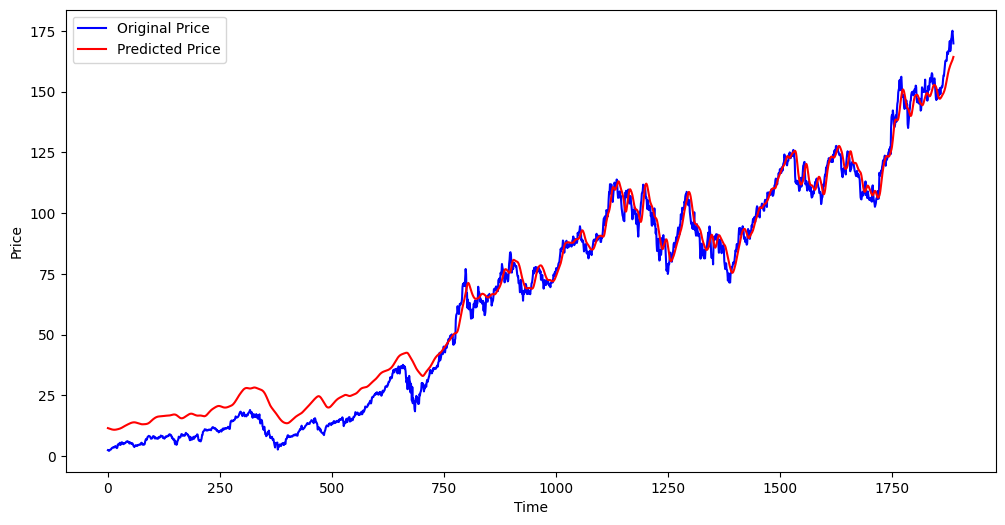

In [82]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()